# Cancelaciones OTP
¿Cómo varı́a la cantidad de vuelos cancelados por mes a través de los años? ¿Está
relacionada con la magnitud de los retrasos y el OTP? ¿Se puede predecir el delay
solamente con las cancelaciones?

¿Se pueden utilizar las cancelaciones como un indicador de performance?

## Build

In [2]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.2.1
-- The CXX compiler identification is GNU 9.2.1
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/nicolas/dev/tp3/tp3/bin/python3 (found version "3.7.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.7m.so
-- pybind11 v2.4.dev4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/nicolas/dev/tp3
-- Configuring done
-- Generating done
-- Bui

## Imports

In [4]:
import predict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def otp(dataframe, groups):
    total = dataframe.groupby(groups).size()
    delayed = dataframe[dataframe['ArrDelay']>15].groupby(groups).size()
    return delayed/total

In [6]:
def cancels(dataframe, groups):
    return dataframe[dataframe['Cancelled'] != 0].groupby(groups).size()

    

In [4]:
# Ejemplo
x= [1,2]
y = [1,1]
def cuadratica(x):
    return np.array([x*x,x,1]);

cml = predict.CML(cuadratica,3)
res =cml.fit(x,y)



## Experimentacion

In [7]:
csvfile="2008.csv" 
root="../data/"
df = pd.read_csv(root+csvfile)


In [8]:
motp = otp(df, ['Month'])
mcan = cancels(df, ['Month'])


In [9]:
motp.plot()

ImportError: matplotlib is required for plotting.

In [ ]:
mcan.plot()

In [ ]:
plt.scatter(motp, mcan)

### Cancelaciones mensuales
¿Cómo varı́a la cantidad de vuelos cancelados por mes a través de los años?

In [28]:
cans = pd.Series([])
otps = pd.Series([])
files=[
    "1994.csv",
    "1995.csv",
    "1996.csv",
    "1997.csv",
    "1998.csv",
    "1999.csv",
    "2000.csv",
#    "2001.csv",
#    "2002.csv",
    "2003.csv",
    "2004.csv",
    "2005.csv",
    "2006.csv",
    "2007.csv",
    "2008.csv" 
]
root="../data/"
for file in files:
    frame = pd.read_csv(root+file)
    monthly_cancels = cancels(frame,['Year','Month'])
    monthly_otps = otp(frame,['Year','Month'])
    cans = pd.concat([cans, monthly_cancels])
    otps = pd.concat([otps, monthly_otps])

    


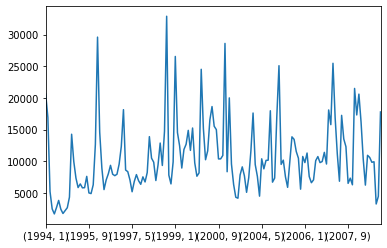

In [29]:
cans.plot()

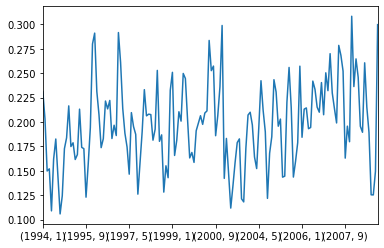

In [30]:
otps.plot()

In [ ]:
plt.scatter(otps, cans)

### Tratamos de predecir las cancelaciones a traves del tiempo

In [4]:
y = cans.to_numpy()
x = np.array(range(0, y.size()))


def cuadratica(x):
    return np.array([x*x,x,1]);

cml = predict.CML(cuadratica,3)
res = cml.fit(x,y)

predicted = map(cml.predict, x)

plt.plot(x, predicted)